# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Audy
- **Email:** audymuhammad@gmail.com
- **ID Dicoding:** audiml20



## Menentukan Pertanyaan Bisnis

- What is the trend in the number of bicycle users in recent years?
- What is the pattern of bike rentals by season?
- What is the pattern of bike rentals by weather?
- How do bike rentals compare between holidays and weekdays?
- How do daily bike rentals compare?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
day_df = pd.read_csv('/content/data/day.csv')

In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv('/content/data/hour.csv')

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There is no duplicate data on `day_df` and `hour_df`

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Converting numbers to descriptions in `day_df` and `hour_df`



In [13]:
#Rechange the month data: int: str > into defined data

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

#Rechanging seasons data, base on 4 seasons: int:str > into defined data

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

#Rechanging weekday data: int:str > into defined data

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

#Rechanging years data: int:str > into defined data

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

#Rechanging workingday and holiday data: int:str > into defined data

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

#Rechanging weather: int:str > into defined data

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Not Cloudy',
    2: 'Misty/Cloudy',
    3: 'Rainy/Rain',
    4: 'Severe Weather Conditions'
})

In [14]:
#Categorize each data that has been defined

day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Not Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Not Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Not Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
#Rechange the month data: int: str > into defined data

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

#Rechanging seasons data, base on 4 seasons: int:str > into defined data

hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

#Rechanging weekday data: int:str > into defined data

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

#Rechanging years data: int:str > into defined data

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

#Rechanging workingday and holiday data: int:str > into defined data

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

#Rechanging weather: int:str > into defined data

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Not Cloudy',
    2: 'Misty/Cloudy',
    3: 'Rainy/Rain',
    4: 'Severe Weather Conditions'
})

In [16]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Not Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Not Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Not Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Not Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Not Cloudy,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

### **Analysis by Trend**

In [18]:
trend_bike = day_df.groupby(by='yr', observed=False).agg({
    'cnt': 'mean'
})

In [19]:
trend_bike.head()

,cnt
yr,
2011,3405.761644
2012,5599.934426


### **Grouping renters by season**

In [21]:
day_df.groupby('season', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

### **The comparison Analysis: Daily based**

In [23]:
day_df.groupby(by='weekday', observed=False).agg({
    'cnt':['max','min','mean']
}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

cnt                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

### **The comparison Analysis: on Holidays and Weekdays**

In [25]:
day_df.groupby(by='workingday', observed=False).agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
Holiday     8714  605  4330.168831
Workingday  8362   22  4584.820000

# Visualization & Explanatory Analysis

### 1. What is the trend in the number of bicycle users in recent years?

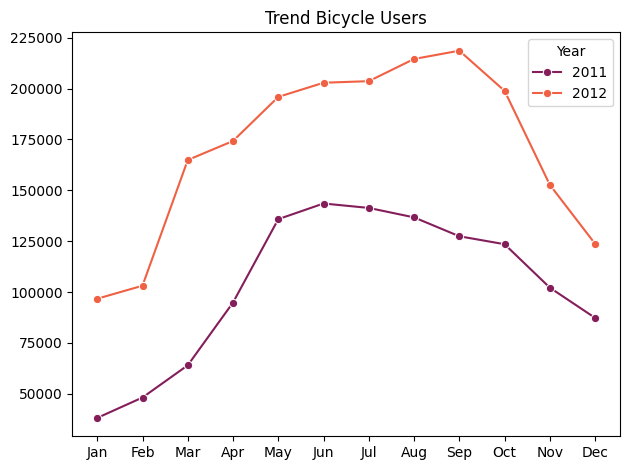

In [28]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"], observed=False).agg({
    "cnt": "sum"
})

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Trend Bicycle Users")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

### 2. What is the pattern of bike rentals by season?

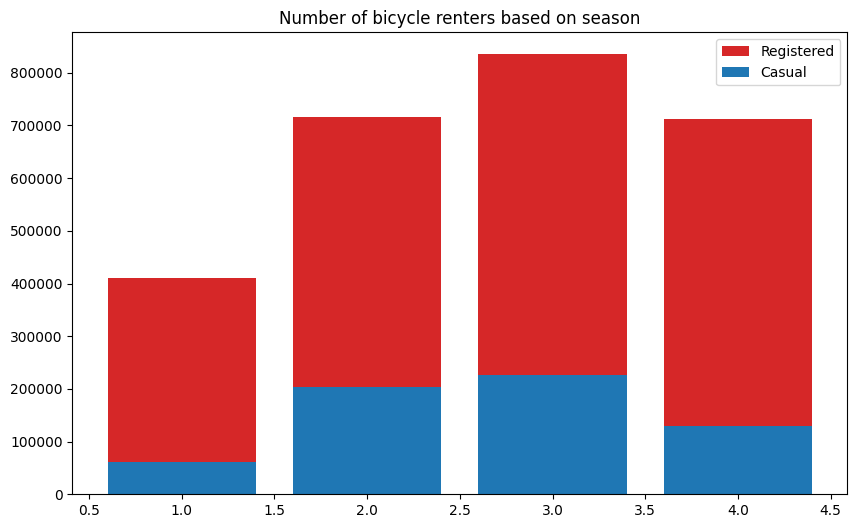

In [21]:
season_pattern = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

season_order = ['spring', 'summer', 'fall', 'winter']

plt.figure(figsize=(10, 6))

plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color='tab:blue',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bicycle renters based on season')
plt.legend()
plt.show()

### 3. What is the pattern of bike rentals by weather?

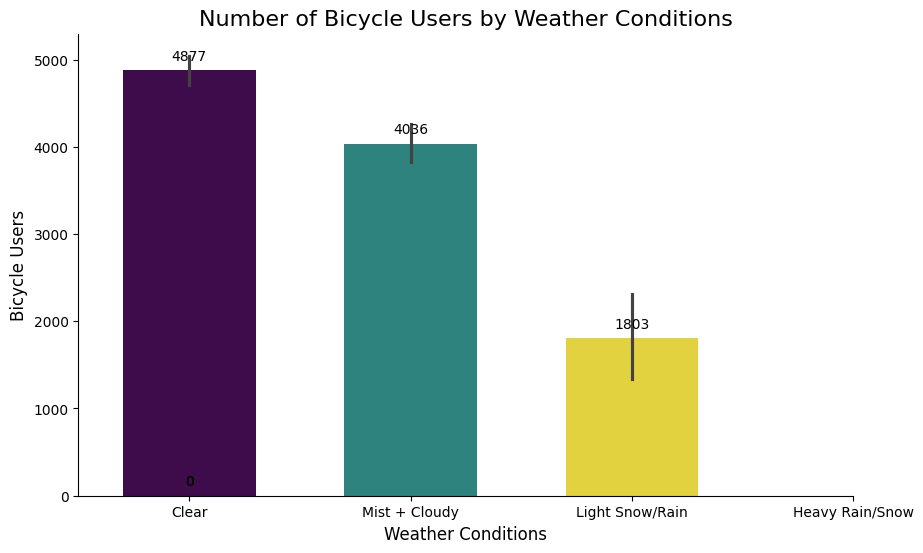

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    hue='weathersit',
    palette='viridis',
    dodge=False,
    width=0.6
)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Number of Bicycle Users by Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Bicycle Users', fontsize=12)

weather_labels = ['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.xticks(range(len(weather_labels)), weather_labels, fontsize=10)

plt.yticks(fontsize=10)
sns.despine()
plt.legend([], [], frameon=False)
plt.show()

### 4. How do bike rentals compare between holidays and weekdays?

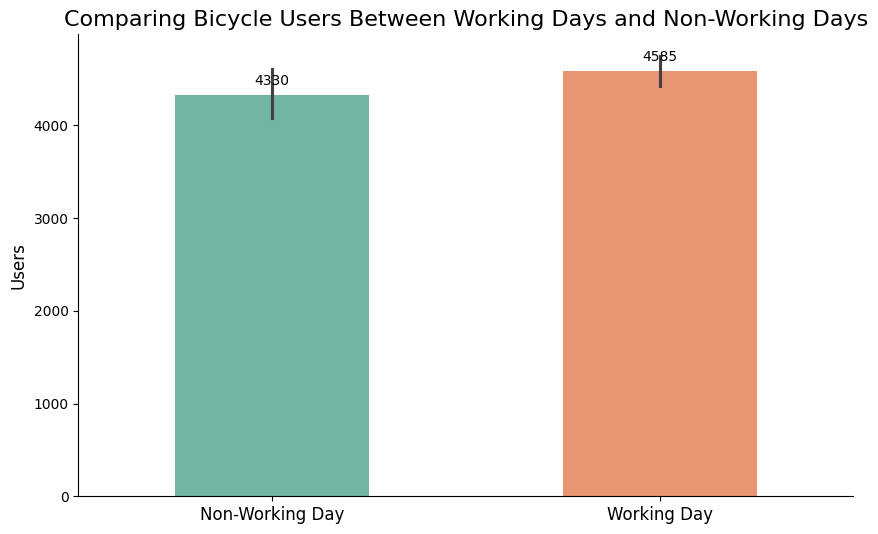

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    hue='workingday',
    palette="Set2",
    legend=False,
    dodge=False,
    width=0.5
)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Comparing Bicycle Users Between Working Days and Non-Working Days', fontsize=16)
plt.xlabel(None)
plt.ylabel('Users', fontsize=12)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'], fontsize=12)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

### 5. How do daily bike rentals compare?

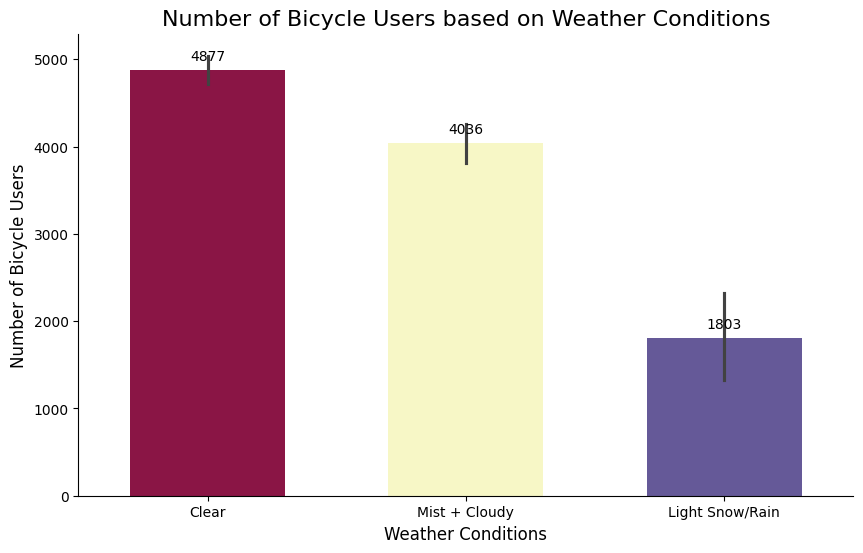

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    hue='weathersit',
    palette="Spectral",
    legend=False,
    dodge=False,
    width=0.6
)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Number of Bicycle Users based on Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Bicycle Users', fontsize=12)
plt.xticks([0, 1, 2], ['Clear', 'Mist + Cloudy', 'Light Snow/Rain'], fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

Based on the analysis conducted on the bike-sharing dataset, several key conclusions can be drawn:

1. Trend in Bicycle Users:
   - The number of bicycle users has been increasing over the years (2011-2012).
   - There is an apparent seasonality in bicycle usage, with higher rentals during warmer months.

2. Bike Rentals by Season:
   - Registered users are consistent across seasons, demonstrating consistent usage habits.
   - Casual users tend to prefer the warmer seasons, indicating that they are more weather-sensitive.

3. Bike Rentals by Weather:
   - Clear/Not Cloudy weather conditions lead to the highest numbers of bike rentals, followed by Misty/Cloudy.
   - Weather with rain/snow significantly decreases the number of bike rentals.

4. Holiday vs. Weekday Bike Rentals:
   - The average number of users on working days is higher than on holidays.

5. Daily Bike Rentals Comparison:
   - The number of rentals is highest on clear days, decreasing on days with mist or light rain/snow.


The above conclusions are supported by the visualizations generated for each question, such as line plots for trends, bar plots for comparisons across categories, etc. The analysis provides valuable insights into the factors impacting bike-sharing usage and can be utilized to optimize the bike-sharing business.

For instance, the finding of weather's strong influence on rentals suggests the need for implementing weather-resistant infrastructure or adjusting pricing strategies during inclement weather.  Understanding the difference in usage patterns between registered and casual users helps in developing appropriate marketing and service strategies for each user group.

Further analysis and exploration can be carried out by investigating relationships between other variables, implementing more complex modelling techniques, or examining granular datasets at the hour level.

In [35]:
all_df = pd.concat([day_df, hour_df], axis=0)

In [36]:
all_df.to_csv("all_data.csv", index=False)